In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [2]:
data = pd.read_csv("cleaned.csv")

In [3]:
data.head()

,SOLD DATE,ADDRESS,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,May-6-2020,8415 SE Schwind Cir,98664,699999,1,1.0,VANCOUVER: THE HEIGHTS (SW),100,15245,1960,106,7000,0,45.601924,-122.590982
1,April-15-2020,7607 SE Harney St,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376
2,June-12-2020,7220 NE 33rd Dr,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957
3,May-27-2020,6804 SE 77th Ave,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730
4,February-28-2020,3134 NE 76th Ave,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665


In [4]:
data.columns

Index(['SOLD DATE', 'ADDRESS', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [5]:
# data = data.dropna()

In [96]:
data.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,2293.000000,2.293000e+03,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,97211.713912,5.693409e+05,3.208461,2.009376,2137.190186,5538.473615,1944.051897,81.493240,282.298735,1.221108,45.531120,-122.643574
std,31.820397,2.362861e+05,0.904799,0.832907,865.930298,4743.493387,34.850947,51.720981,157.598126,16.180819,0.039343,0.049362
min,97035.000000,2.190000e+05,1.000000,1.000000,100.000000,861.000000,1880.000000,1.000000,91.000000,0.000000,45.455898,-122.764945
25%,97206.000000,4.160000e+05,3.000000,1.000000,1506.000000,4356.000000,1919.000000,36.000000,231.000000,0.000000,45.498532,-122.684429
50%,97211.000000,5.170000e+05,3.000000,2.000000,2088.000000,4791.000000,1932.000000,76.000000,269.000000,0.000000,45.532089,-122.632720
75%,97215.000000,6.500000e+05,4.000000,2.500000,2603.000000,5662.000000,1957.000000,126.000000,316.000000,0.000000,45.564296,-122.604940
max,98664.000000,3.400000e+06,8.000000,6.000000,7088.000000,135907.000000,2020.000000,178.000000,7000.000000,454.000000,45.607584,-122.539143


In [97]:
data.dtypes

SOLD DATE              object
ADDRESS                object
ZIP OR POSTAL CODE      int64
PRICE                   int64
BEDS                  float32
BATHS                 float32
LOCATION               object
SQUARE FEET           float32
LOT SIZE                int64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET           int64
HOA/MONTH               int64
LATITUDE              float64
LONGITUDE             float64
dtype: object

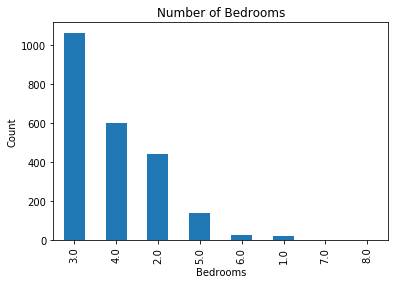

In [103]:
data['BEDS'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine
plt.savefig('bedrooms.png')

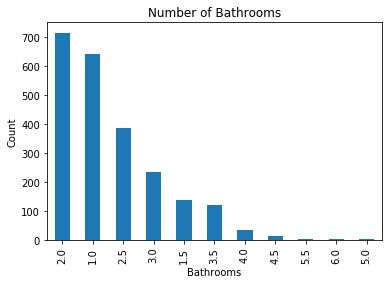

In [111]:
data['BATHS'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine
plt.savefig('bathrooms.png')

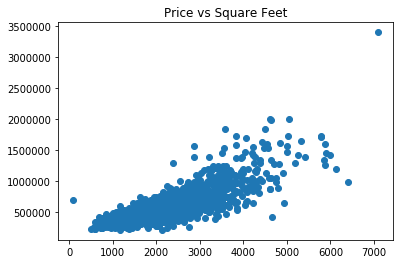

In [100]:
plt.scatter(data['SQUARE FEET'],data['PRICE'])
plt.title("Price vs Square Feet")
plt.savefig('square-feet.png')

Text(0.5, 1.0, 'Price over Time')

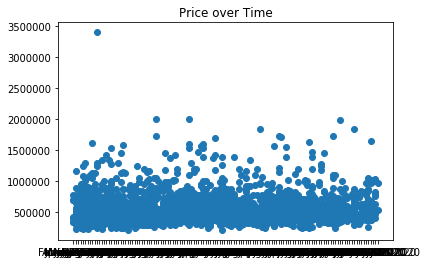

In [112]:
plt.scatter(data['SOLD DATE'],data['PRICE'])
plt.title("Price over Time")

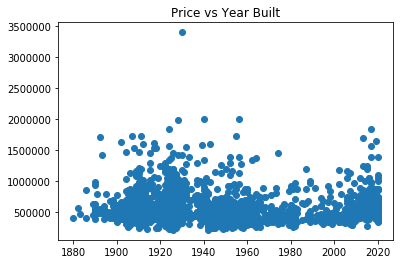

In [114]:
plt.scatter(data['YEAR BUILT'],data['PRICE'])
plt.title("Price vs Year Built")
plt.savefig('year-built.png')

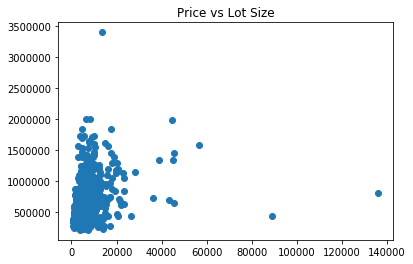

In [108]:
plt.scatter(data['LOT SIZE'],data['PRICE'])
plt.title("Price vs Lot Size")
plt.savefig('lot-size.png')

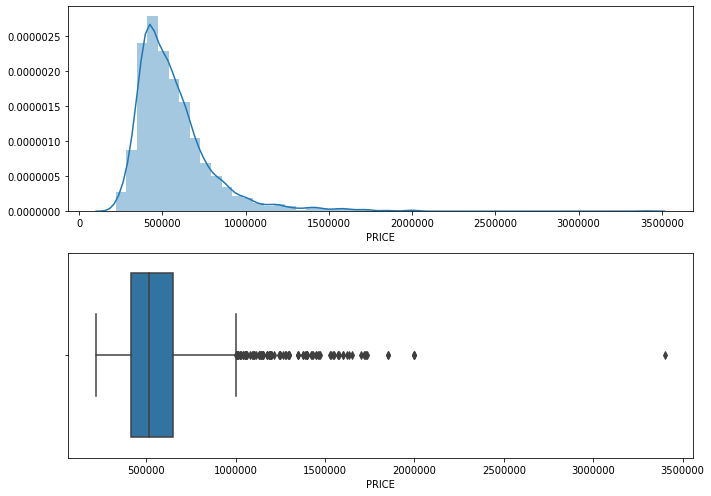

In [110]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['PRICE'])
fig.add_subplot(2,1,2)
sns.boxplot(data['PRICE'])
plt.tight_layout()
plt.savefig('distribution.png')

C:\Users\blain\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # This is added back by InteractiveShellApp.init_path()


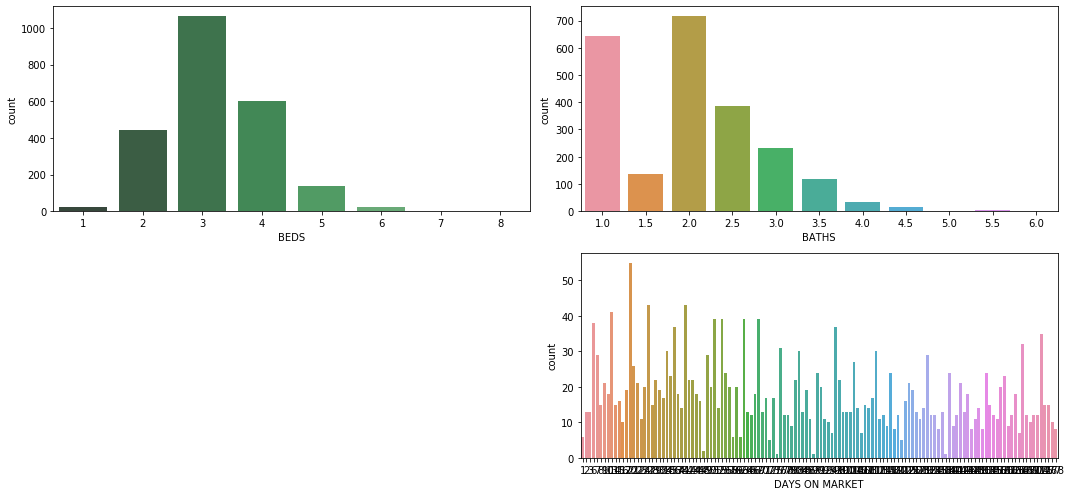

In [11]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['BEDS'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
# sns.countplot(data['SQUARE FEET'])
# fig.add_subplot(2,2,3)
sns.countplot(data['BATHS'])
fig.add_subplot(2,2,4)
sns.countplot(data['DAYS ON MARKET'])
plt.tight_layout()

Text(0.5, 1.0, 'Price vs Location of the area')

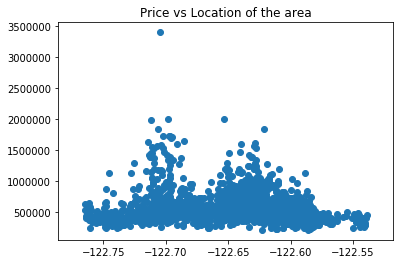

In [12]:
plt.scatter(data['LONGITUDE'],data['PRICE'])
plt.title("Price vs Location of the area")


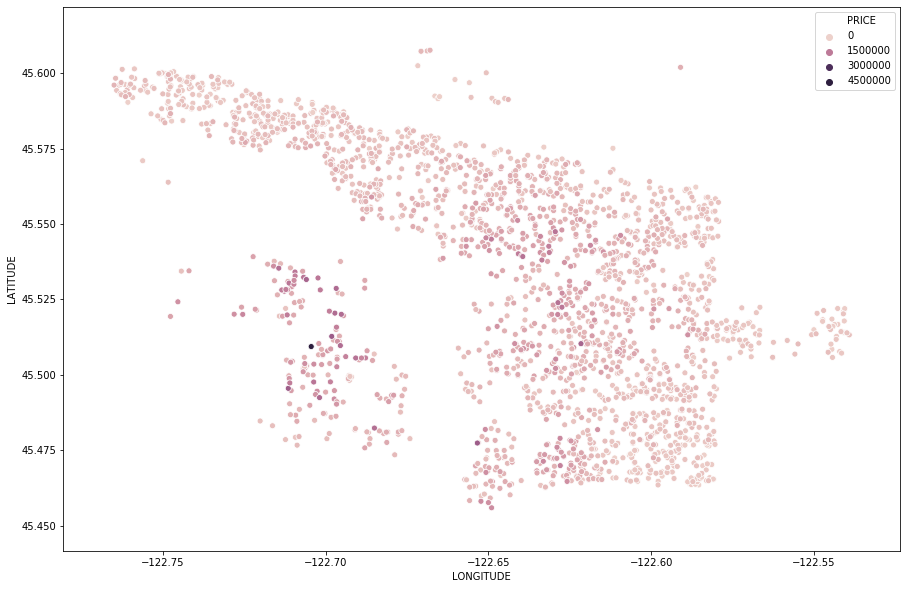

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=data,hue='PRICE')

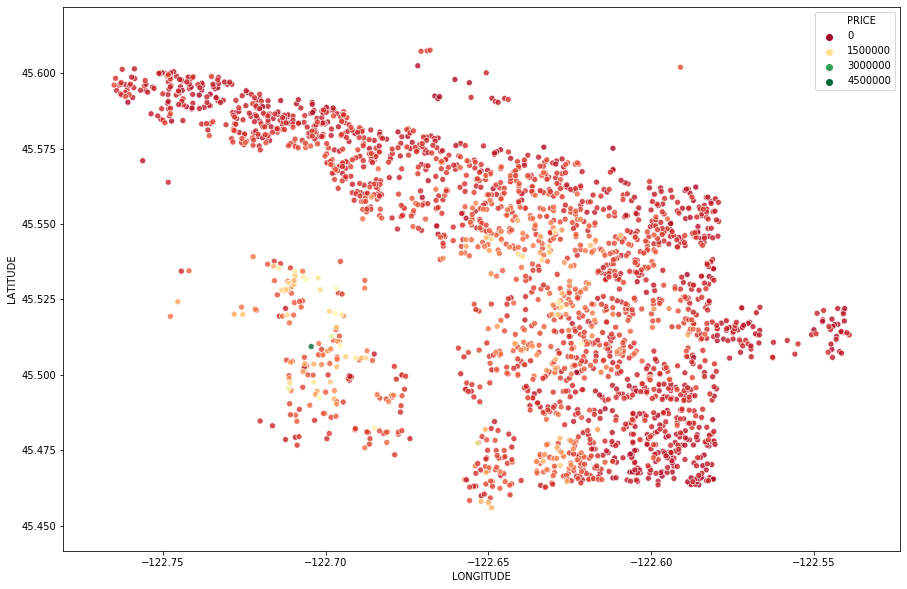

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE', data=data ,alpha = 0.8,palette = 'RdYlGn', hue='PRICE')

In [17]:
data.corr()['PRICE'].sort_values(ascending=False)

PRICE                 1.000000
SQUARE FEET           0.805500
BATHS                 0.663722
BEDS                  0.515963
LOT SIZE              0.238916
$/SQUARE FEET         0.050108
ZIP OR POSTAL CODE    0.038763
HOA/MONTH            -0.003815
YEAR BUILT           -0.018538
DAYS ON MARKET       -0.056273
LONGITUDE            -0.128792
LATITUDE             -0.135775
Name: PRICE, dtype: float64

In [18]:
data.columns

Index(['SOLD DATE', 'ADDRESS', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()

In [88]:
data['BEDS'] = pd.to_numeric(data['BEDS'], downcast='float')
data['BATHS'] = pd.to_numeric(data['BATHS'], downcast='float')
data['SQUARE FEET'] = pd.to_numeric(data['SQUARE FEET'], downcast='float')


In [89]:
data.dtypes

SOLD DATE              object
ADDRESS                object
ZIP OR POSTAL CODE      int64
PRICE                   int64
BEDS                  float32
BATHS                 float32
LOCATION               object
SQUARE FEET           float32
LOT SIZE                int64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET           int64
HOA/MONTH               int64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [90]:
y = data['PRICE'].values.reshape(-1, 1)
X = data.drop(['SOLD DATE', 'PRICE','ADDRESS','LOCATION', '$/SQUARE FEET'], axis=1)
print(X.shape, y.shape)

(2293, 10) (2293, 1)


In [91]:
print(X)

      ZIP OR POSTAL CODE  BEDS  BATHS  SQUARE FEET  LOT SIZE  YEAR BUILT  \
0                  98664   1.0    1.0        100.0     15245        1960   
1                  97206   1.0    1.0        504.0      5662        1949   
2                  97211   2.0    1.0        572.0     11761        1944   
3                  97206   1.0    1.0        577.0      5662        1927   
4                  97213   1.0    1.0        600.0      4791        1914   
...                  ...   ...    ...          ...       ...         ...   
2288               97239   6.0    4.5       5897.0     45302        1926   
2289               97205   6.0    4.5       5991.0      4791        1893   
2290               97210   5.0    4.0       6136.0     16117        1926   
2291               97232   5.0    4.0       6403.0      4791        1910   
2292               97201   5.0    5.5       7088.0     13503        1930   

      DAYS ON MARKET  HOA/MONTH   LATITUDE   LONGITUDE  
0                106          

In [92]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.50,random_state =2)

In [93]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.715212643020687


In [95]:
model.score(x_test, y_test)

0.6881121259315917

In [47]:
testing_score = model.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.8538082585023882


In [48]:
reg = LinearRegression().fit(x_test, y_test)
reg.coef_

array([[-3.22619702e+02, -9.25365328e+03,  2.90732008e+04,
         2.78832350e+02, -2.61620570e-01,  5.73864578e+01,
        -4.27674477e+01,  1.84615865e+03, -3.37355499e+01,
        -2.50266705e+04, -7.35981690e+04]])

In [49]:
intercept = reg.intercept_
intercept

array([22795763.13735384])

In [50]:
bath_entry = 4
bed_entry = 4
square_feet_entry = 2580
lot_size_entry = 2613
year_built_entry = 1920
latitude_entry = 45.499533
longitude_entry = -122.675113

In [51]:
new_value =  intercept + (bath_entry *(2753.67269318)) + (bed_entry *(7783.46472586)) + (square_feet_entry *(287.89119617)) 
print(f"Based on the entered parameters, the home is worth the following: ${new_value}")

Based on the entered parameters, the home is worth the following: $[23580670.9731486]


In [52]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [54]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[-2.01219021e+03, -5.36656848e+03,  2.60614320e+04,
         2.41953848e+05,  1.22162653e+03,  6.73471801e+01,
        -1.58574498e+03,  1.32168423e+05, -3.83507630e+03,
        -3.77410172e+02, -1.94950472e+03]])

In [56]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_predd[0]})
df1 = df.head(10)
df1

,Actual,Predicted
0,405000,390563.594683


In [57]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

NameError: name 'y_pred' is not defined

<Figure size 720x360 with 0 Axes>

In [58]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 56374.79
Mean Squared Error:169695130543.03
Root Mean Squared Error:411940.69
Variance score is: -2.50


In [59]:
data['PRICE'].mean()

569340.8774531182

## Keras Regression

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential()

model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [62]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
12/12 [==============================] - 0s 17ms/step - loss: 390235160576.0000 - val_loss: 359097565184.0000
Epoch 2/400
12/12 [==============================] - 0s 3ms/step - loss: 390234931200.0000 - val_loss: 359097335808.0000
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 390234669056.0000 - val_loss: 359097106432.0000
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 390234374144.0000 - val_loss: 359096778752.0000
Epoch 5/400
12/12 [==============================] - 0s 3ms/step - loss: 390234079232.0000 - val_loss: 359096418304.0000
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 390233686016.0000 - val_loss: 359095992320.0000
Epoch 7/400
12/12 [==============================] - 0s 3ms/step - loss: 390233096192.0000 - val_loss: 359095402496.0000
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 390232506368.0000 - val_loss: 359094681600.0000
Epoch 9/400
12/12 [============

12/12 [==============================] - 0s 3ms/step - loss: 368134979584.0000 - val_loss: 337875763200.0000
Epoch 69/400
12/12 [==============================] - 0s 3ms/step - loss: 366544388096.0000 - val_loss: 336347103232.0000
Epoch 70/400
12/12 [==============================] - 0s 3ms/step - loss: 364820398080.0000 - val_loss: 334772895744.0000
Epoch 71/400
12/12 [==============================] - 0s 3ms/step - loss: 363070685184.0000 - val_loss: 333088653312.0000
Epoch 72/400
12/12 [==============================] - 0s 3ms/step - loss: 361214935040.0000 - val_loss: 331317116928.0000
Epoch 73/400
12/12 [==============================] - 0s 3ms/step - loss: 359235256320.0000 - val_loss: 329480798208.0000
Epoch 74/400
12/12 [==============================] - 0s 3ms/step - loss: 357191319552.0000 - val_loss: 327551746048.0000
Epoch 75/400
12/12 [==============================] - 0s 3ms/step - loss: 355033382912.0000 - val_loss: 325545787392.0000
Epoch 76/400
12/12 [=================

Epoch 135/400
12/12 [==============================] - 0s 3ms/step - loss: 97697914880.0000 - val_loss: 102210035712.0000
Epoch 136/400
12/12 [==============================] - 0s 3ms/step - loss: 94209597440.0000 - val_loss: 99986767872.0000
Epoch 137/400
12/12 [==============================] - 0s 2ms/step - loss: 90814799872.0000 - val_loss: 97936531456.0000
Epoch 138/400
12/12 [==============================] - 0s 3ms/step - loss: 87748632576.0000 - val_loss: 96058114048.0000
Epoch 139/400
12/12 [==============================] - 0s 3ms/step - loss: 84654112768.0000 - val_loss: 94363582464.0000
Epoch 140/400
12/12 [==============================] - 0s 3ms/step - loss: 81763336192.0000 - val_loss: 92780142592.0000
Epoch 141/400
12/12 [==============================] - 0s 3ms/step - loss: 78962737152.0000 - val_loss: 91323695104.0000
Epoch 142/400
12/12 [==============================] - 0s 3ms/step - loss: 76455403520.0000 - val_loss: 90082820096.0000
Epoch 143/400
12/12 [==========

12/12 [==============================] - 0s 3ms/step - loss: 34318886912.0000 - val_loss: 147982647296.0000
Epoch 203/400
12/12 [==============================] - 0s 3ms/step - loss: 34105475072.0000 - val_loss: 149279539200.0000
Epoch 204/400
12/12 [==============================] - 0s 3ms/step - loss: 33900511232.0000 - val_loss: 150331932672.0000
Epoch 205/400
12/12 [==============================] - 0s 3ms/step - loss: 33694179328.0000 - val_loss: 151709597696.0000
Epoch 206/400
12/12 [==============================] - 0s 3ms/step - loss: 33487149056.0000 - val_loss: 153355976704.0000
Epoch 207/400
12/12 [==============================] - 0s 3ms/step - loss: 33273550848.0000 - val_loss: 154693419008.0000
Epoch 208/400
12/12 [==============================] - 0s 3ms/step - loss: 33085024256.0000 - val_loss: 155902984192.0000
Epoch 209/400
12/12 [==============================] - 0s 3ms/step - loss: 32884064256.0000 - val_loss: 157071638528.0000
Epoch 210/400
12/12 [=================

12/12 [==============================] - 0s 3ms/step - loss: 23307196416.0000 - val_loss: 241774346240.0000
Epoch 270/400
12/12 [==============================] - 0s 3ms/step - loss: 23179012096.0000 - val_loss: 243060031488.0000
Epoch 271/400
12/12 [==============================] - 0s 3ms/step - loss: 23052109824.0000 - val_loss: 244394967040.0000
Epoch 272/400
12/12 [==============================] - 0s 3ms/step - loss: 22928023552.0000 - val_loss: 245619064832.0000
Epoch 273/400
12/12 [==============================] - 0s 3ms/step - loss: 22804250624.0000 - val_loss: 246926508032.0000
Epoch 274/400
12/12 [==============================] - 0s 3ms/step - loss: 22675044352.0000 - val_loss: 248443928576.0000
Epoch 275/400
12/12 [==============================] - 0s 3ms/step - loss: 22550812672.0000 - val_loss: 250006536192.0000
Epoch 276/400
12/12 [==============================] - 0s 3ms/step - loss: 22428938240.0000 - val_loss: 251497742336.0000
Epoch 277/400
12/12 [=================

12/12 [==============================] - 0s 3ms/step - loss: 16322592768.0000 - val_loss: 328184594432.0000
Epoch 337/400
12/12 [==============================] - 0s 3ms/step - loss: 16245444608.0000 - val_loss: 329255845888.0000
Epoch 338/400
12/12 [==============================] - 0s 3ms/step - loss: 16159822848.0000 - val_loss: 330714087424.0000
Epoch 339/400
12/12 [==============================] - 0s 3ms/step - loss: 16077761536.0000 - val_loss: 332139134976.0000
Epoch 340/400
12/12 [==============================] - 0s 3ms/step - loss: 15997113344.0000 - val_loss: 332828246016.0000
Epoch 341/400
12/12 [==============================] - 0s 3ms/step - loss: 15919823872.0000 - val_loss: 333760692224.0000
Epoch 342/400
12/12 [==============================] - 0s 3ms/step - loss: 15838348288.0000 - val_loss: 335543369728.0000
Epoch 343/400
12/12 [==============================] - 0s 3ms/step - loss: 15762054144.0000 - val_loss: 335934554112.0000
Epoch 344/400
12/12 [=================

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


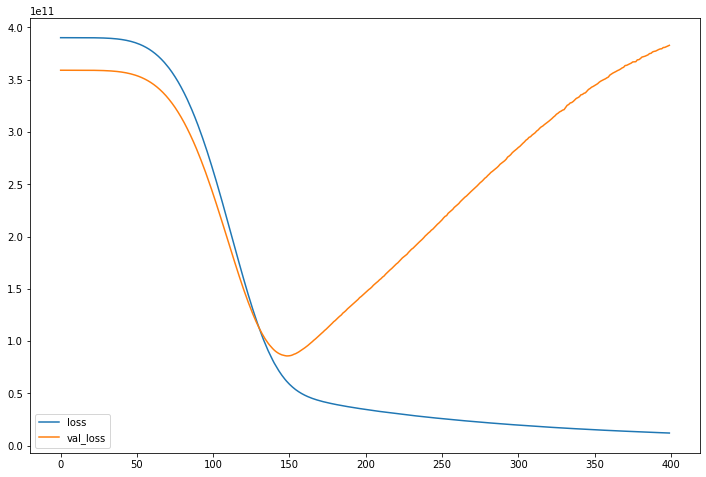

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [65]:
y_pred = model.predict(X_test)

In [66]:
y_test

array([[ 405000],
       [ 432000],
       [ 460000],
       [ 586000],
       [ 450000],
       [ 318000],
       [ 630000],
       [ 396000],
       [1025000],
       [ 599900],
       [ 460000],
       [1735000],
       [ 740000],
       [ 498000],
       [ 304114],
       [ 620000],
       [ 615000],
       [ 450000],
       [ 635000],
       [ 572000],
       [ 515000],
       [ 447500],
       [ 420000],
       [ 845000],
       [ 570000],
       [ 530000],
       [ 925000],
       [ 725000],
       [ 596000],
       [ 471937],
       [ 625000],
       [ 510000],
       [ 525000],
       [ 625000],
       [ 551000],
       [ 640000],
       [ 443500],
       [ 445000],
       [ 597000],
       [ 762000],
       [ 855500],
       [ 480000],
       [ 400000],
       [ 875000],
       [ 512500],
       [ 339000],
       [ 785000],
       [ 485000],
       [ 525000],
       [ 365000],
       [ 375000],
       [ 500000],
       [ 347000],
       [ 262000],
       [ 844000],
       [ 4

In [67]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 109415.61
Mean Squared Error: 382930091370.80
Root Mean Squared Error: 618813.45
Variance score is: -6.90


In [68]:
data['PRICE'].mean()

569340.8774531182

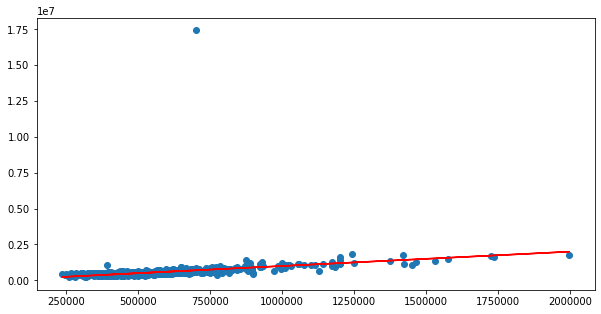

In [69]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

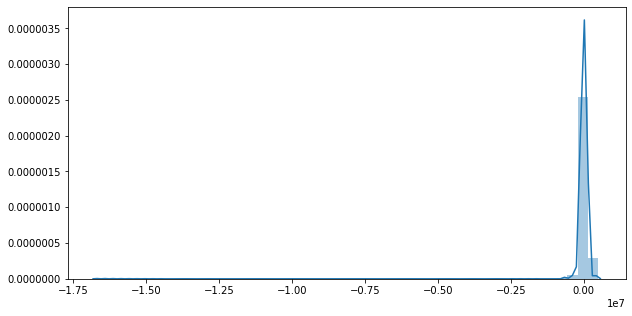

In [70]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [73]:
single_house = data.drop(['SOLD DATE', 'PRICE','ADDRESS','LOCATION'],axis = 1).iloc[0]

In [197]:
single_house

ZIP OR POSTAL CODE    97045.000000
BEDS                      4.000000
BATHS                     3.000000
SQUARE FEET            2621.000000
DAYS ON MARKET            1.000000
LATITUDE                 45.328852
LONGITUDE              -122.631600
Name: 0, dtype: float64

In [75]:
single_house = s_scaler.transform(single_house.values.reshape(-1,11))

In [76]:
model.predict(single_house)

array([[17433722.]], dtype=float32)

In [77]:
data['PRICE'][0]

699999

In [78]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 109415.61
Mean Squared Error(MSE): 382930091370.80
Root Mean Squared Error(RMSE): 618813.45
Variance score: -689.78

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 56374.79
Mean Squared Error(MSE):169695130543.03
Root Mean Squared Error(RMSE):411940.69
Variance score: -249.99
